# Pytorch Logistic Regression
---
by Pranpaveen Lay.

In [1]:
# import requests

# url = 'https://raw.githubusercontent.com/layel2/pattern-course-ku/main/datagen.py''
# r = requests.get(url, allow_redirects=True)
# open('datagen.py', 'wb').write(r.content)

################# or #######

#!wget https://raw.githubusercontent.com/layel2/pattern-course-ku/main/datagen.py

In [2]:
import torch
from matplotlib import pyplot as plt
import datagen
import numpy as np

In [3]:
x,y = datagen.gaussian()

In [4]:
x = torch.tensor(x)
y = torch.tensor(y)

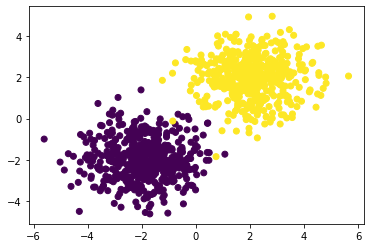

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

# Concept

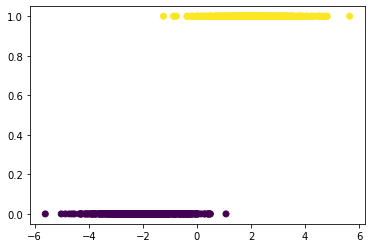

In [6]:
plt.scatter(x[:,0],y,c=y)

In [7]:
def model(x,w,b):
    return torch.nn.Sigmoid()(w*x+b)
def loss_fn(y,y_pred):
    return ((y-y_pred)**2).mean()

In [8]:
w = torch.rand(())
b = torch.rand(())

In [9]:
w,b

(tensor(0.0992), tensor(0.9744))

In [13]:
data_x = x[:,0]
data_y = y

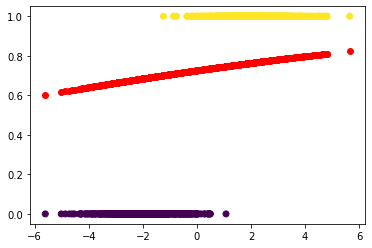

In [14]:
plt.scatter(x[:,0],y,c=y)
plt.scatter( data_x,model(x[:,0],w,b),c='r')

In [15]:
n_epochs = 1000
lr = 0.01

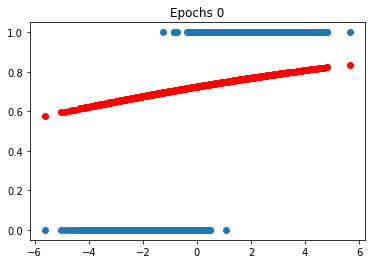

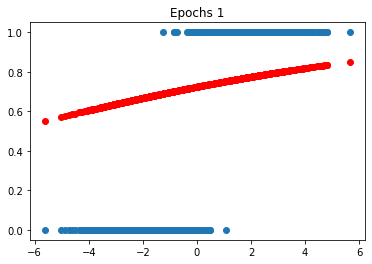

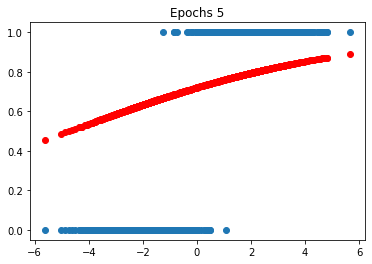

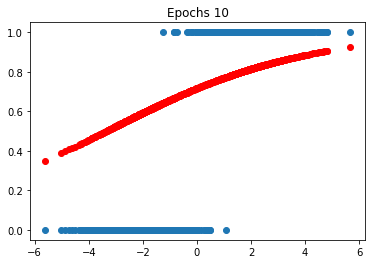

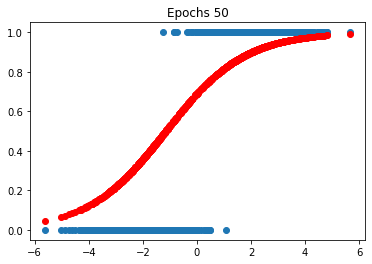

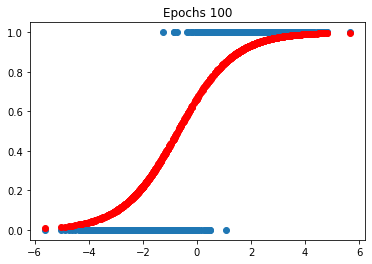

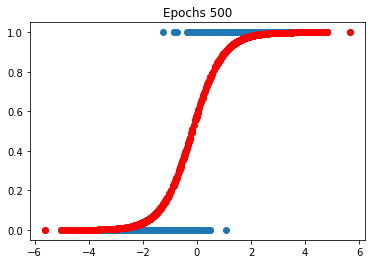

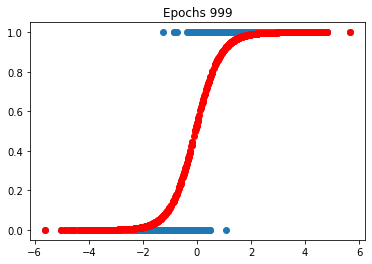

In [16]:
loss_log = []
for epoch in range(n_epochs):
    y_pred = model(data_x, w, b)
    loss = loss_fn(data_y,y_pred)
    d_w = (-2*data_x*(data_y-y_pred)).mean()
    d_b = (-2*(data_y-y_pred)).mean()
    w = w - lr*d_w
    b = b - lr*d_b
    loss_log.append(loss)
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_x,data_y)
        plt.scatter( data_x,model(x[:,0],w,b),c='r')
        plt.title(f'Epochs {epoch}')

In [17]:
model = torch.nn.Sequential(torch.nn.Linear(2,1),
                           torch.nn.Sigmoid())

In [18]:
loss_fn = torch.nn.BCELoss()

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [24]:
x = x.float()
y = y.float()

In [25]:
y_pred.reshape(-1).shape

torch.Size([1000])

In [26]:
y.shape

torch.Size([1000])

In [27]:
loss_log = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(x).reshape(-1)
    loss = loss_fn(y_pred, y)
    loss.backward()

    optimizer.step()
    loss_log.append(loss.item())

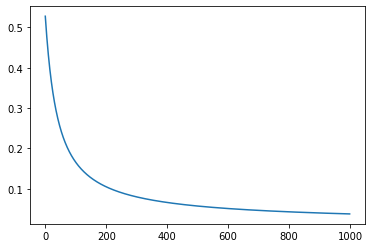

In [28]:
plt.plot(loss_log)

In [29]:
((y_pred > 0.5).float() == y).sum()/len(y)

tensor(0.9930)

In [30]:
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx = torch.tensor(xx,dtype=torch.float32)
yy = torch.tensor(yy,dtype=torch.float32)
Z = model(torch.stack([xx.ravel(), yy.ravel()],1))
Z = Z>0.5
Z = Z.reshape(xx.shape).detach().numpy()

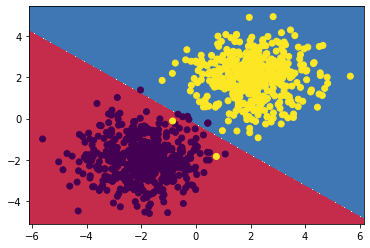

In [31]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(x[:,0],x[:,1],c=y)

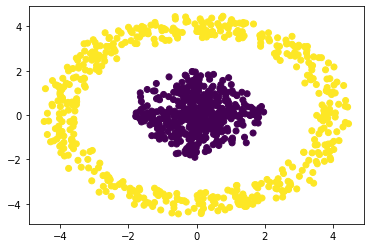

In [114]:
x,y = datagen.circular()
plt.scatter(x[:,0],x[:,1],c=y)

In [115]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [116]:
# x2 = torch.cat([x,x.pow(2)],1)
# x2.shape

In [196]:
model = torch.nn.Sequential(torch.nn.Linear(2,10),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(10,1),
                           torch.nn.Sigmoid())

In [197]:
loss_fn = torch.nn.BCELoss()

In [198]:
n_epochs = 1000
lr = 0.01

In [204]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [205]:
loss_log = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(x).reshape(-1)
    loss = loss_fn(y_pred, y)
    loss.backward()

    optimizer.step()
    loss_log.append(loss.item())
    if epoch%100 ==0 :
        print(f"epoch{epoch} accuracy : {(((y_pred > 0.5).float() == y).sum()/len(y)).item()}")

epoch0 accuracy : 0.7580000162124634
epoch100 accuracy : 1.0
epoch200 accuracy : 1.0
epoch300 accuracy : 1.0
epoch400 accuracy : 1.0
epoch500 accuracy : 1.0
epoch600 accuracy : 1.0
epoch700 accuracy : 1.0
epoch800 accuracy : 1.0
epoch900 accuracy : 1.0


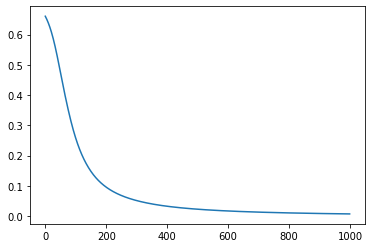

In [206]:
plt.plot(loss_log)

In [207]:
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx = torch.tensor(xx,dtype=torch.float32)
yy = torch.tensor(yy,dtype=torch.float32)
mdt = torch.stack([xx.ravel(), yy.ravel()],1)
#mdt = torch.cat([mdt,mdt.pow(2)],1)
Z = model(mdt)
Z = Z>0.5
Z = Z.reshape(xx.shape).detach().numpy()

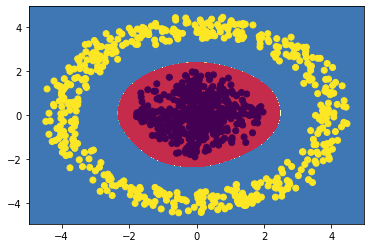

In [208]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(x[:,0],x[:,1],c=y)